In [1]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
raw_data = pd.read_csv("../00-data/train.csv")
raw_data.sample(10)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
47776,99269,SCH,F,42,Y,Y,0,0,3,2,3,36500,N,0
53273,13182,PGR,M,55,Y,Y,0,1,1,1,1,110000,N,0
17101,18661,SCH,F,50,Y,N,0,0,2,1,3,31000,N,1
72027,32914,GRD,M,67,N,N,0,0,5,1,3,50000,N,0
64332,35791,GRD,F,28,N,N,0,0,1,1,2,8600,N,0
19326,109545,SCH,M,38,Y,Y,0,0,1,2,3,100000,N,0
10057,88793,SCH,F,52,N,N,0,0,3,2,3,15000,N,0
6510,8424,GRD,F,36,N,N,0,1,6,2,3,60000,Y,0
5593,91360,UGR,M,32,N,N,0,0,2,2,3,35000,Y,0
34806,68206,SCH,F,43,N,N,0,1,2,1,1,18000,N,0


In [4]:
print(f"Raw data size: {raw_data.shape[0]}")

Raw data size: 73799


<AxesSubplot:>

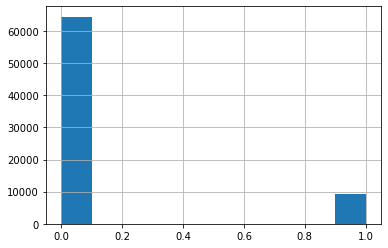

In [5]:
raw_data.default.hist()

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [7]:
raw_data.isna().sum(axis=0).sort_values(ascending=False)

education           307
client_id             0
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

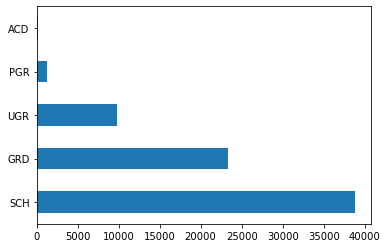

In [8]:
raw_data["education"].value_counts().plot(kind="barh")

<AxesSubplot:>

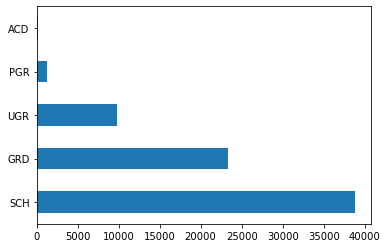

In [9]:
raw_data["education"].value_counts().plot(kind="barh")

<AxesSubplot:xlabel='income', ylabel='Count'>

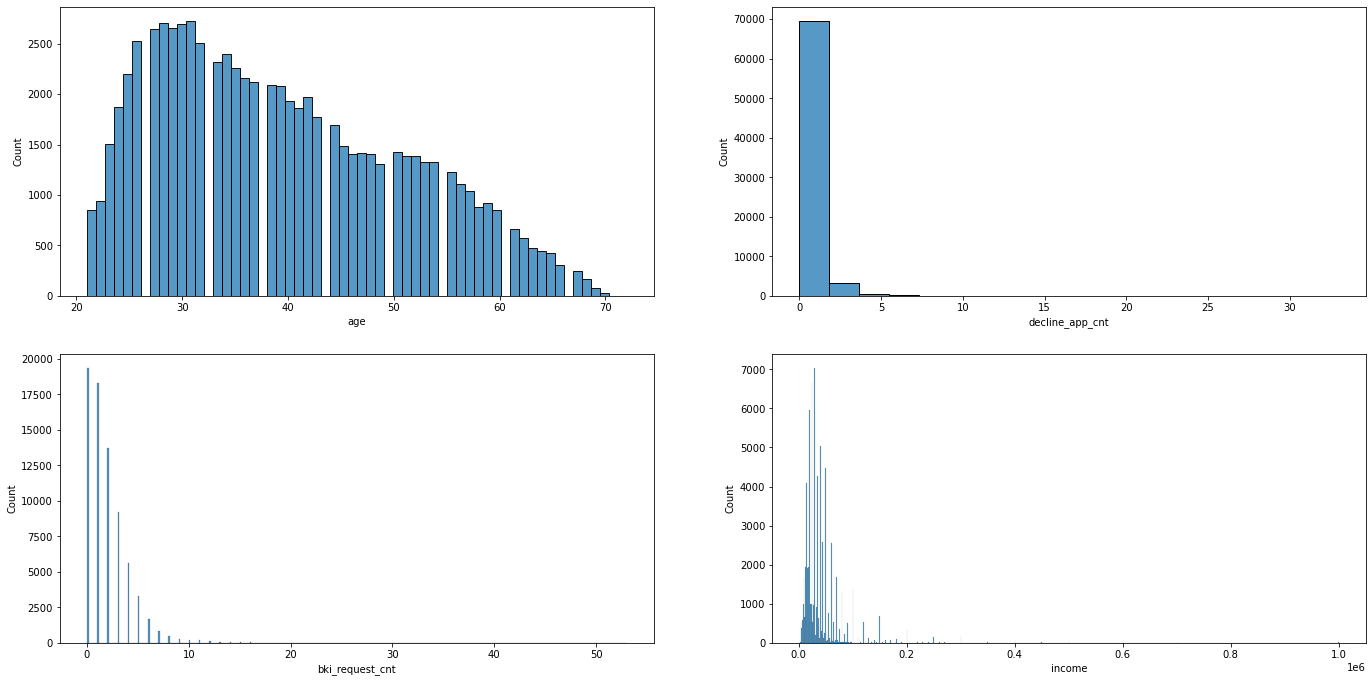

In [10]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(23.4, 11.7)
sns.histplot(x="age", data=raw_data[["age"]], ax=axes[0, 0])
sns.histplot(x="decline_app_cnt", data=raw_data[["decline_app_cnt"]], ax=axes[0, 1])
sns.histplot(x="bki_request_cnt", data=raw_data[["bki_request_cnt"]], ax=axes[1, 0])
sns.histplot(x="income", data=raw_data[["income"]], ax=axes[1, 1])

<AxesSubplot:xlabel='income'>

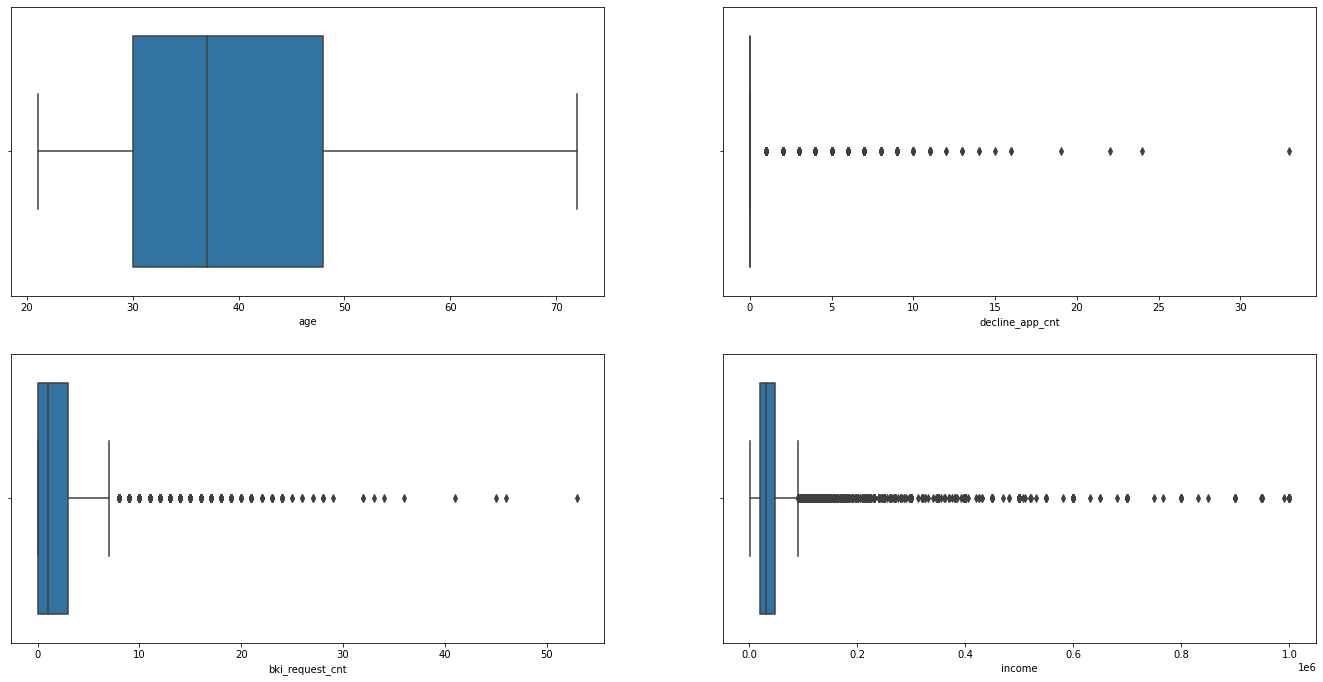

In [11]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(23.4, 11.7)
sns.boxplot(x="age", data=raw_data[["age"]], ax=axes[0, 0])
sns.boxplot(x="decline_app_cnt", data=raw_data[["decline_app_cnt"]], ax=axes[0, 1])
sns.boxplot(x="bki_request_cnt", data=raw_data[["bki_request_cnt"]], ax=axes[1, 0])
sns.boxplot(x="income", data=raw_data[["income"]], ax=axes[1, 1])

<AxesSubplot:xlabel='income', ylabel='Count'>

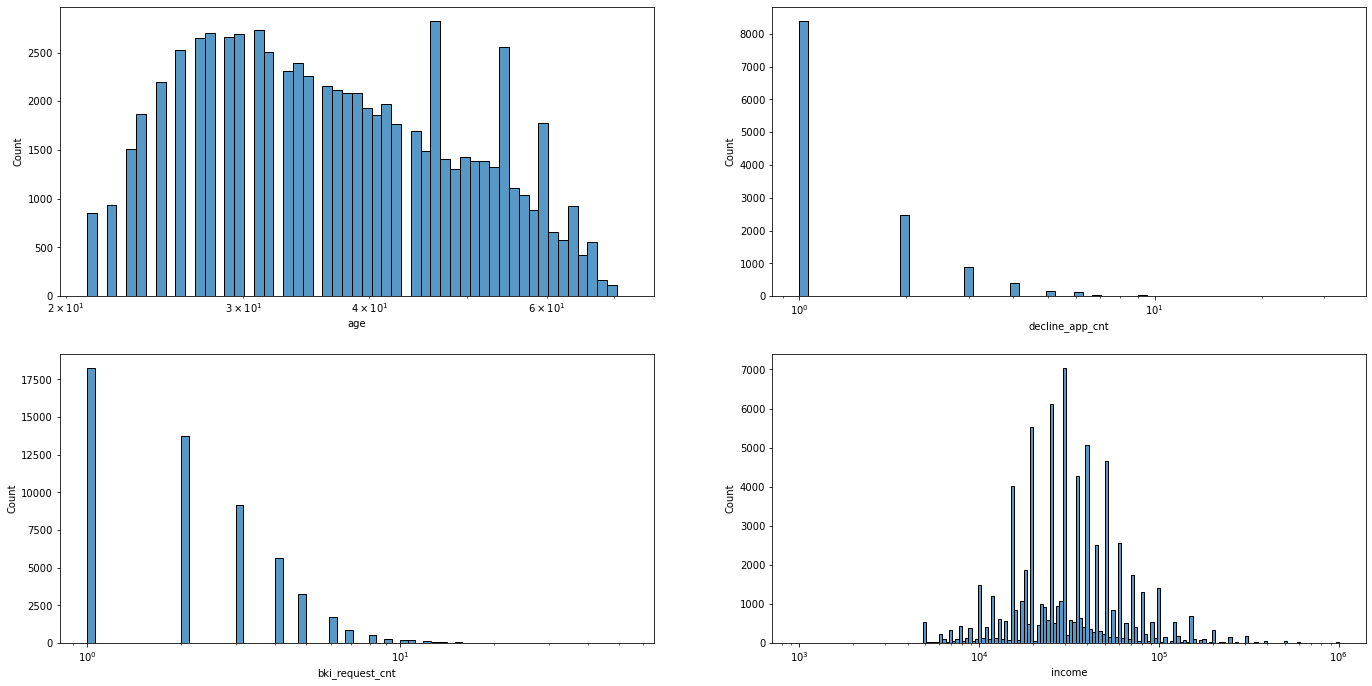

In [12]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(23.4, 11.7)

sns.histplot(data=raw_data["age"].dropna(), ax=axes[0, 0], log_scale=True)
sns.histplot(
    data=raw_data[raw_data["decline_app_cnt"] > 0]["decline_app_cnt"].dropna(),
    ax=axes[0, 1], log_scale=True)
sns.histplot(
    data=raw_data[raw_data["bki_request_cnt"] > 0]["bki_request_cnt"].dropna(),
    ax=axes[1, 0], log_scale=True)
sns.histplot(
    data=raw_data["income"].dropna(),
    ax=axes[1, 1], log_scale=True)

In [13]:
num_cols = ["age", "decline_app_cnt", "bki_request_cnt", "income"]
bin_cols = ["sex", "car", "car_type", "foreign_passport", "good_work"]
cat_cols = ["education", "home_address", "work_address"]

<AxesSubplot:>

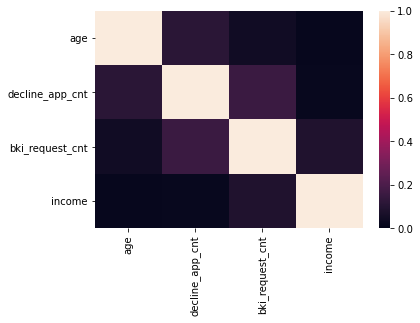

In [14]:
sns.heatmap(raw_data[num_cols].corr().abs(), vmin=0, vmax=1)

In [15]:
raw_data[num_cols].corr()

,age,decline_app_cnt,bki_request_cnt,income
age,1.000000,-0.111175,0.046265,-0.018900
decline_app_cnt,-0.111175,1.000000,0.155894,-0.021687
bki_request_cnt,0.046265,0.155894,1.000000,0.082983
income,-0.018900,-0.021687,0.082983,1.000000


<AxesSubplot:>

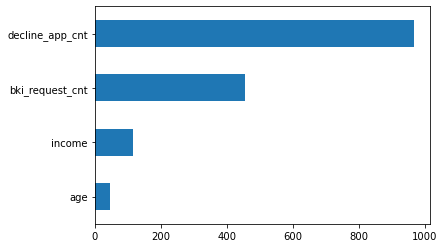

In [16]:
imp_num = pd.Series(f_classif(raw_data[num_cols], raw_data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [17]:
label_encoder_sex = LabelEncoder()

mapped_sex = pd.Series(label_encoder_sex.fit_transform(raw_data['sex']))
print(dict(enumerate(label_encoder_sex.classes_)))

{0: 'F', 1: 'M'}


In [18]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    raw_data[column] = label_encoder.fit_transform(raw_data[column])
    
# убедимся в преобразовании    
raw_data.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0


In [21]:
label_encoder_education = LabelEncoder()

raw_data["education"] = label_encoder_education.fit_transform(raw_data["education"])
print(dict(enumerate(label_encoder_education.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR', 5: nan}


<AxesSubplot:>

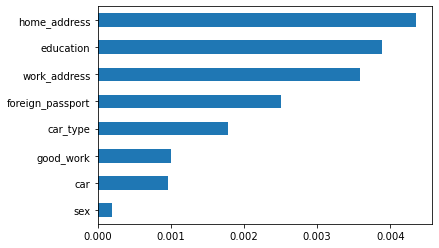

In [20]:
imp_cat = Series(
    mutual_info_classif(
            raw_data[bin_cols + cat_cols], raw_data['default'],
            discrete_features =True
        ),
    index = bin_cols + cat_cols
)

imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [22]:
X_cat = OneHotEncoder(sparse = False).fit_transform(raw_data[cat_cols].values)
X_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [24]:
X_cat.shape

(73799, 12)

In [25]:
X_num = StandardScaler().fit_transform(raw_data[num_cols].values)
X_num.shape

(73799, 4)

In [27]:
# Объединяем

X = np.hstack([X_num, raw_data[bin_cols].values, X_cat])
Y = raw_data['default'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)